In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable
from joblib import dump, load

In [28]:
df_encoded_itapetininga = pd.read_excel(r"..\data\encoded_itapetininga.xlsx")

In [29]:
X = df_encoded_itapetininga[["mês", "solo", "municipio"]]
y = df_encoded_itapetininga[["cultura1", "cultura2", "cultura3"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [30]:
decisionTree = load(r"..\models\decisionTree.joblib")
knn = load(r"..\models\knn.joblib")
randomForest = load(r"..\models\randomForest.joblib")

In [34]:
acc_randomForest = randomForest.score(X,y)
acc_decisionTree = decisionTree.score(X,y)
acc_knn = knn.score(X,y)


c:\Users\artsferreira\Anaconda3\envs\tcc\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\artsferreira\Anaconda3\envs\tcc\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\artsferreira\Anaconda3\envs\tcc\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [36]:
x = PrettyTable()

x.field_names = ["Modelo", "Input", "Acurácia"]

x.add_row(["ÁRVORE DE DECISÃO", "Mês/Solo/Município", acc_decisionTree])
x.add_row(["KNN", "Mês/Solo/Município", acc_knn])
x.add_row(["RANDOM FOREST", "Mês/Solo/Município", acc_randomForest])

print(x)

+-------------------+--------------------+--------------------+
|       Modelo      |       Input        |      Acurácia      |
+-------------------+--------------------+--------------------+
| ÁRVORE DE DECISÃO | Mês/Solo/Município | 0.9278628079281316 |
|        KNN        | Mês/Solo/Município | 0.8563685636856369 |
|   RANDOM FOREST   | Mês/Solo/Município | 0.8807588075880759 |
+-------------------+--------------------+--------------------+


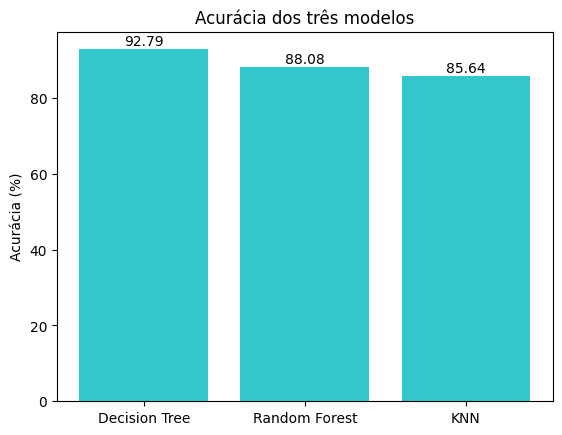

In [45]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'Decision Tree', 'KNN']
accuracy_scores = [acc_randomForest, acc_decisionTree, acc_knn]

models, accuracy_scores = zip(*sorted(zip(models, accuracy_scores), key=lambda x: x[1], reverse=True))

# Multiplicando a acuracia por 100
accuracy_scores = [score * 100 for score in accuracy_scores]

# barra vertical
plt.bar(models, accuracy_scores, color="#33c7cc")

# adicionando título e informando a acurácia exata
plt.ylabel('Acurácia (%)')
plt.title('Acurácia dos três modelos')

# Add accuracy values to the bars
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 1, str(round(v, 2)), ha='center')

# Show the plot
plt.show()
